# Major League Baseball Game Logs, Linear Regression

*The information used here was obtained free of charge from and is copyrighted by Retrosheet.  Interested parties may contact Retrosheet at "www.retrosheet.org".*

## 1. Introduction

In the two earlier projects in this series, we performed and exploratory data analysis on the Major League Baseball (MLB) historical game logs. In part 1, we looked at offensive statistics and how they evolved over time with an eye toward model development. There, we concluded

- The period from 1920-present is the most appropriate era for analysis or game-log data. Popularly, 1920 marks the end of what is known as the "dead ball" era.
 - The rules established by 1920 are generally the same rules in the modern game.
 - This era represents a relatively stable run-scoring environment.
 - Of the rules change that occurred after 1920, the introduction of designated hitter (DH) to the American League in 1973 had the most impact on run scoring. 

In part 2, we looked at how the various statistics are distributed. We concluded
- The negative-binomial distribution has the best performance and should be the first choice when the data is not under dispersed.
- When the data is under dispersed, the Poisson or binomial distributions are likely the next best choices.
- The beta-binomial distribution generally has the worst performance of the four mentioned here, but parameter estimation is fast and easy so it should be included for consideration if the negative-binomial is not an option.

The next logical question might be: what are each of these statistics worth? The goal of a baseball game is to win by scoring more runs than your opponent, so how much does a walk or a home run contribute to that effort? How much does a wild pitch or caught stealing detract from that effort? We will try to answer this question by fitting a linear regression model on team scores and examining the coefficient estimates. 

First, we must acknowledge that a linear regression model may not be the best choice to model the number runs scored. We will address this issue in more detail below, but several of the fundamental assumptions of a linear regression model are violated in this data set. This does, however, give us an opportunity to examine regression model diagnostics in detail. Furthermore, the results here will be a baseline for comparison in future projects.


## 2. Motivation

The goal of this project is to develop a linear regression model for runs scored in an MLB game using game-log counting statistics from the year 1920 to present. This model will estimate the value of each of the statistics in terms of run scoring. That is, can we estimate the number of runs scored with each unit increase of the various statistics present in the data set.

The secondary goal of this project is to look at the linear regression model diagnostics in detail. Assuming that one or more key assumptions are violated, we will evaluate the performance of the model and use it as a baseline for comparison again other methods in future projects.

The data set we are using for this analysis is the same game-log data we have used in the two earlier projects, with one change. We want the data in terms of what may contribute to the number of runs scored by a team, so the defensive stats must be from the opponent. The offensive and baserunning statistics shall remain the same. With that, the data set consists of the following variables:

**Offensive Categories**
- *season*: Season in which game is played (year).
- *league*: League of the home team.
- *win*: Indicator of win or loss.
- *score*: Number of runs scored by a team's offense.
- *ab*: Number of at-bats for a team's offense. An official at-bat comes when a batter reaches base via a fielder's choice, hit or an error (not including catcher's interference) or when a batter is put out on a non-sacrifice.
- *1b*: Number singles for a team's offense.
- *2b*: Number of doubles for a team's offense.
- *3b*: Number of triples for a team's offense.
- *4b*: Number of home runs for a team's offense.
- *sach*: Number of sacrifice hits (or sacrifice bunts) for a team's offense. A sacrifice bunt occurs when a player is successful in his attempt to advance a runner (or multiple runners) at least one base with a bunt.
- *sacf*: Number of sacrifice flies for a team's offense. A sacrifice fly occurs when a batter hits a fly-ball out to the outfield or foul territory that allows a runner to score. The batter is given credit for an RBI.
- *hbp*: Number of hit-by-pitches for a team's offense. A hit-by-pitch occurs when a batter is struck by a pitched ball without swinging at it. He is awarded first base as a result. Strikes supersede hit-by-pitches, meaning if the umpire rules that the pitch was in the strike zone or that the batter swung, the HBP is nullified.
- *bb*: Number of base-on-balls (walks) for a team's offense. A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter. After refraining from swinging at four pitches out of the zone, the batter is awarded first base. In the scorebook, a walk is denoted by the letters BB.
- *ibb*: Number of intentional base-on-balls (walks) for a team's offense. An intentional walk occurs when the defending team chooses to walk a batter on purpose, putting him on first base instead of letting him try to hit.
- *k*: Number of strikeouts for a team's offense.
- *sb*: Number of stolen bases for a team.
- *cs*: Number of caught stealing for a team.
- *gidp*: Number of grounded-into-double-plays for a team's offense. A GIDP occurs when a player hits a ground ball that results in multiple outs on the bases.
- *ci*: Number of catcher's interference awarded to a teams' offense. The batter is awarded first base if the catcher (or any other fielder) interferes with him at any point during a pitch. If first base was occupied at the time of the pitch, the runner who held the base is allowed to move up one base.
- *lob*: The total number (over the course of a game) of runners left on base at the end of each inning by a team's offense.

**Defensive Categories**

- *oppNumPitchers*: Number of pitchers appearing in the for the opponent's defense.
- *oppER*: Number of earned runs surrendered by the opponent's defense. An earned run is any run that scores against a pitcher without the benefit of an error or a passed ball.
- *oppTeamER*: Number of earned runs surrendered by the opponent's defense that is not assigned to a specific pitcher.
- *oppWP*: Number of wild pitches surrendered by the opponent's defense. A pitcher is charged with a wild pitch when his pitch is so errant that the catcher is unable to control it and, as a result, baserunner(s) advance.
- *oppBalk*: Number of balks surrendered by the opponent's defense. A balk occurs when a pitcher makes an illegal motion on the mound that the umpire considers to be deceitful to the runner(s).
- *oppPO*: Number of putouts recorded by the opponent's defense. A fielder is credited with a putout when he is the fielder who physically records the act of completing an out -- whether it be by stepping on the base for a forceout, tagging a runner, catching a batted ball, or catching a third strike.
- *oppAssist* Number of assists recorded by the opponent's defense. An assist is awarded to a fielder who touches the ball before a putout is recorded by another fielder. Typically, assists are awarded to fielders when they throw the ball to another player -- but a fielder receives an assist if he touches the ball, even if the contact was unintentional.
- *opERR*: Number of errors recorded by the opponent's defense. A fielder is given an error if, in the judgment of the official scorer, he does not convert an out on a play that an average fielder should have made. Fielders can also be given errors if they make a poor play that allows one or more runners to advance on the bases.
- *opPB*: Numnber of passed balls recorded by the opponent's defense. A catcher is charged with a passed ball when he does not hold or control a legally pitched ball that, with ordinary effort, should have been maintained under his control, and, because of this loss of control, the batter or a runner on base advances. A runner who advances due to a passed ball is not credited with a stolen base unless he breaks for the base before the pitcher begins his delivery.
- *oppDP*: Number of double plays recorded by the opponent's defense. A double play occurs when two offensive players are ruled out within the same play.
- *oppTP*: Number of triple plays recorded by the opponent's defense. A triple play occurs when three offensive players are ruled out within the same play.


## 3. Analysis

### 3.1 Import and Function Definitions


In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.graphics.gofplots import ProbPlot
import random as r
import itertools
import scipy.stats
import numpy as np
import json

In [ ]:
def ttvSplit(indexIn,splits=[0.8,0.1,0.1]):
    """
    Parameters
    ----------
    indexIn : Dataframe index
        Index of the dataframe to be split into training, testing and validation sets.
    splits : List, optional
        Proportions of indices assigned to training, testing, and validation sets. 
        The default is [0.8,0.1,0.1].

    Returns
    -------
    Ragged list of randomly selected indices to slice a dataframe into training, testing, and validation data sets.

    """
    # convert i into a list
    if type(indexIn)!=list:
        indexIn = list(indexIn)
    
    # shuffle list
    r.shuffle(indexIn)
    
    # add 0th position to split locaitons
    splits = [0] + splits
    
    # calc split locations
    splits = len(indexIn)*np.cumsum(splits)/sum(splits)
    splits = splits.astype(int)

    # create output list    
    splitOut = []
    
    #generate output list
    for idx in range(len(splits)-1):
        splitOut.append(indexIn[splits[idx]:splits[idx+1]])
        
    return(splitOut)

def getCooksDistLine(nParam, lev, factor):
    """
    Helper function for plotting Cook's distance curves
    """
    formula = lambda x: np.sqrt((factor * nParam * (1 - x)) / x)
    x = np.linspace(min(lev), max(lev), 50)
    y = formula(x)
    return x, y


def plotOLSResidualsHist(resOLS, tightLayout=False, pltTitle='Residual Distribution', figureSize=(10.5,6)):
    """
    Parameters
    ----------
    resOLS : statsmodels.regression.linear_model.RegressionResultsWrapper
        Results object obtained from fitting the linear model.
    tightLayout : Bool, optional
        Matplotlib.pyplot option to render plot with tight layout. The default is False.
    pltTitle : String, optional
        Title for the plot figure. The default is 'Residual Distribution'.
    figureSize : tuple, optional
        Size of the plot in inches (width,height). The default is (10.5,6).

    Returns
    -------
    None.

    """
    
    #check dist of residuals with kernel density
    plt.figure(figsize=figureSize,tight_layout=tightLayout)
    sns.histplot(resOLS.resid,stat='density',kde=True)

    # add normal plot
    x = np.linspace(-7,7,100)
    plt.plot(x,scipy.stats.norm.pdf(x,
                                    resOLS.resid.mean(),
                                    resOLS.resid.std()),
             color='green')
    plt.legend(['KDE','Normal'])
    plt.title(pltTitle, fontweight='bold')
    txt = f'Test for normality\n    Omnibus: {round(resOLS.diagn["omni"],2)}, p-value: {round(resOLS.diagn["omnipv"],3)}\n    Jarque_Bera: {round(resOLS.diagn["jb"],2)}, p-value: {round(resOLS.diagn["jbpv"],3)}'
    plt.text(-7,0.25,txt)
    
    return()

def olsDiagnosticPlots(olsResults, tightLayout=False, figureSize=(10,10), figureTitle='Diagnostic Plots'):
    """  
    Parameters
    ----------
    olsResults : statsmodels.regression.linear_model.RegressionResultsWrapper
        Results from a fitted OLS model (statsmodels).
    tightLayout : Bool, optional
        Matplotlib.pyplot option to render plot with tight layout. The default is False.
    figureSize : Tuple, optional
        Dimensions of the figure. The default is (10,10).
    figureTitle : String, optional
        Title of the figure. The default is ''.

    Returns
    -------
    Fig. 
    matplotlib.figure.Figure 
    Four panel diagnostic plots for OLS regression

    """
    
    # step 1. unpack model results
    yTrue = olsResults.model.endog
    yHat = olsResults.fittedvalues
    X = olsResults.model.exog
    XNames = olsResults.model.exog_names
    
    residuals = np.array(olsResults.resid)
    influence = olsResults.get_influence()
    residNorm = influence.resid_studentized_internal
    residNormAbsSqrt = np.sqrt(np.abs(residNorm))
    leverage = influence.hat_matrix_diag
    cooksDistance = influence.cooks_distance[0]
    numParams = len(olsResults.params)
    
    
    # Step 2. Calc Cooks distance reference lines
    formula0 = lambda x: np.sqrt((0.5 * numParams * (1 - x)) / x)
    cooksDistx0 = np.linspace(0.001, max(leverage), 50)
    cooksDisty0 = formula0(cooksDistx0)
    
    formula1 = lambda x: np.sqrt((1.0 * numParams * (1 - x)) / x)
    cooksDistx1 = np.linspace(0.001, max(leverage), 50)
    cooksDisty1 = formula1(cooksDistx1)
        
    fig = plt.figure(figsize=figureSize,tight_layout=tightLayout)
    fig.suptitle(figureTitle,fontweight='bold')
    
    ## Step 3. Create Plots
    # Residuals vs fitted plot
    ax0 = plt.subplot(2,2,1)
    sns.residplot(x=yHat,
                  y=residuals,
                  lowess=True,scatter_kws={'alpha': 0.25},
                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
                  ax=ax0)
    ax0.set_title('Residuals vs. Fitted',fontweight='bold')
    ax0.set_xlabel('Fitted')
    ax0.set_ylabel('Residuals')
    
    # QQ plot
    ax1 = plt.subplot(2,2,2)
    QQ = ProbPlot(residNorm)
    QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax1)
    ax1.set_title('Normal QQ', fontweight="bold")
    ax1.set_xlabel('Theoretical Quantiles')
    ax1.set_ylabel('Standardized Residuals')
    
    # Scale-Location plot
    ax2 = plt.subplot(2,2,3)
    ax2.scatter(yHat, residNormAbsSqrt, alpha=0.25);
    sns.regplot(
        x=yHat,
        y=residNormAbsSqrt,
        scatter=False, ci=False,
        lowess=True,
        line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
        ax=ax2)
    # annotate plot with top 5 residuals
    for i in np.argsort(residNormAbsSqrt,0)[-5:]:
        ax2.annotate(i,
                     xy=(yHat.iloc[i],residNormAbsSqrt[i]),
                     color='red')
    
    ax2.set_title('Scale-Location', fontweight="bold")
    ax2.set_xlabel('Fitted values')
    ax2.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$')
    
    #Leverage Plot
    ax3 = plt.subplot(2,2,4)
    ax3.set_xlim(0,1.1*max(leverage))
    ax3.scatter(
                leverage,
                residNorm,
                alpha=0.5)
    
    sns.regplot(
        x=leverage,
        y=residNorm,
        scatter=False,
        ci=False,
        lowess=True,
        line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
        ax=ax3)
    
    # annotations
    for i in np.argsort(cooksDistance,0)[-5:]:
        ax3.annotate(
            i,
            xy=(leverage[i], residNorm[i]),
            color = 'red')
    
    # Cooks distance 0.5 reference line
    ax3.plot(cooksDistx0, cooksDisty0, label="Cook's distance", lw=1, ls='--', color='red')
    ax3.plot(cooksDistx1, cooksDisty1, lw=1, ls='--', color='red')
    
    ax3.set_title('Residuals vs Leverage', fontweight="bold")
    ax3.set_xlabel('Leverage')
    ax3.set_ylabel('Standardized Residuals')
    ax3.legend(loc='upper right')
    
    return(fig)

def calcVIFCond(exog, verbose=True):
    """
    Parameters
    ----------
    exog : Pandas data frame
        The design matrix (exogenous matrix) for which the variance inflation factor and condition
        number are calculated.

    Returns
    -------
    Dictionary of VIF values for each variable in the design matrix as well as the condition number.

    """

    vifDict= {}
    if verbose==True:
        print('VIF')
    for c in range(len(exog.columns)):
        try:
            vifDict[exog.columns[c]] = VIF(exog.to_numpy(),c)
            if verbose==True:
                print('\t',exog.columns[c],(20-len(exog.columns[c]))*" ",vifDict[exog.columns[c]])
        except TypeError as te:
            print(te)

    condNum = np.linalg.cond(exog.dropna())

    if verbose==True:
        print(f'\nCondition Number: {condNum}\n')

    return(vifDict, condNum)

### 3.2 Load Data

In [ ]:
# load data without index column
df = pd.read_csv('https://github.com/cmtoner/retrosheets-game-logs/raw/main/rs_GameLog_data02.zip', index_col=0)

df.head()

# drop seasons before 1920 and games with 15 or more runs scored
df = df[(df.season>=1920)&(df.score<=15)]

#get Training, Testing, and validation indices
ixTr, ixTe, ixV = ttvSplit(df.dropna().index, splits=[0.6,0.2,0.2])

# define columns of interest (first in series of column slices for consideration)
# drop oppDP and keep gidp
xCols0 = ['ab','1b','2b','3b','4b','sach','sacf','hbp','bb','ibb','k','sb','cs',
          'gidp','ci','oppWP','oppBalk','oppERR','oppPB','oppTP']

df.head()

,season,league,win,score,ab,1b,2b,3b,4b,sach,...,oppER,oppTeamER,oppWP,oppBalk,oppPO,oppAssist,oppERR,oppPB,oppDP,oppTP
0,1933,ML,1,4,31.0,8.0,0.0,0.0,1.0,1.0,...,4.0,4.0,0.0,0.0,24.0,11.0,0.0,0.0,1.0,0.0
1,1935,ML,1,4,32.0,4.0,2.0,1.0,1.0,0.0,...,4.0,4.0,0.0,0.0,24.0,8.0,1.0,0.0,0.0,0.0
2,1937,ML,1,8,35.0,8.0,3.0,1.0,1.0,0.0,...,8.0,8.0,0.0,0.0,24.0,9.0,0.0,0.0,1.0,0.0
3,1939,ML,1,3,31.0,5.0,0.0,0.0,1.0,0.0,...,2.0,2.0,0.0,0.0,24.0,7.0,1.0,0.0,0.0,0.0
4,1941,ML,1,7,36.0,7.0,3.0,0.0,1.0,0.0,...,7.0,7.0,0.0,0.0,26.0,7.0,2.0,0.0,1.0,0.0


### 3.3 Correlation Matrix

Visual inspection of the correlation matrix quickly reveals that we can eliminate *oppER*, *oppTeamER*, and *ab* from consideration; they are essentially double counting *score* and do not provide any additional information. Similarly, we can eliminate *oppPO* and *oppAssist*; these statistics record how an out is made and not how a run is scored. We will also eliminate *season* and *oppNumPitchers*. The number of opposing pitchers faced is influenced by the number of runs scored by a team, not the converse. Also, the positive correlation between *season* and *oppNumPitchers* shows a shift in strategy over time; for a variety of reasons that not relevant to this analysis, teams have put more emphasis on shorter outings by starting pitchers and more reliance on their bullpens. The number of runners left on base (*lob*) is a measure of how many runs a team doesn't score, so it is also eliminated. Scoring more runs implies more runners will be left of base; more runners left on base does not cause more runs to be scored.

We can see a strong positive correlation between runs scored and the number of hits (*1b*, *2b*, *3b*, *4b*) and walks. There are weaker positive correlations between score and *sacf*, *sach*, *hpb*, *ibb*, *sb*, and *cs* as well as weak correlations between score and *k*, *gidp*, *balk*, *err*, and *pb*. 


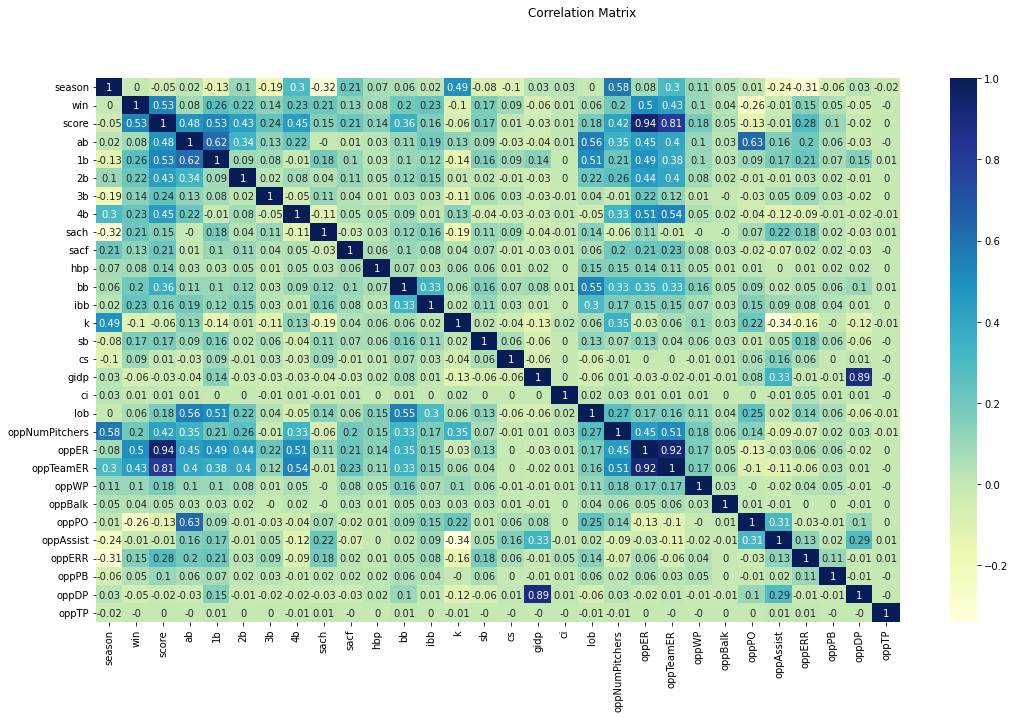

In [ ]:
#plot corr matrix
fig0 = plt.figure(figsize=(18,10), tight_layout=False)
fig0.suptitle('Correlation Matrix')
sns.heatmap(round(df0.corr(),2),cmap="YlGnBu",xticklabels=True, yticklabels=True, annot=True)

# initial thoughts
# 1. scoring runs is positively correlated to hits and BB (as expected)
# 2. score has a weak positive correlation to SACF, SACH, HBP, IBB, SB, and CS
# 3. score has a weak negative correlation to K, GIDP, BALK, ERR, & PB
# 4. Lots of collinearity

### 3.4 Collinearity

#### 3.4.1 Variance Inflation Factor and Condition Number

 Variance inflation factor (VIF) is one method to quantify collinearity among the regressors, with values above 5 indicating a problem and values above 10 indicating a critical level above which p-value and coefficient estimates are unreliable. Removing a variable, linearly combining collinear variables, centering, and using LASSO/Ridge regression/principal component analysis are the most common methods for dealing with collinearity in a data set. 

The condition number is another measure of collinearity. Values above 10 indicate moderate collinearity and values above 30 indicate severe levels of collinearity.


In [ ]:
# calc VIF/cond num of xCols0
_,_ = calcVIFCond(df.loc[ixTr,xCols0])

VIF
	 ab                    24.442501585385113
	 1b                    10.015974420818855
	 2b                    2.7505767783299633
	 3b                    1.2823657097065493
	 4b                    1.8311597352517777
	 sach                  1.5265644458698748
	 sacf                  1.262819005447827
	 hbp                   1.2533970426843601
	 bb                    4.134321986758358
	 ibb                   1.4384059877181503
	 k                     5.159885642649574
	 sb                    1.490581851313442
	 cs                    1.2904728356480275
	 gidp                  1.8351873956588836
	 ci                    1.0099255409154098
	 oppWP                 1.3163006048803292
	 oppBalk               1.041235757700779
	 oppERR                1.86536913047781
	 oppPB                 1.0829404887667866
	 oppTP                 1.0016290516520252

Condition Number: 1081.8536432897956



High VIFs or condition numbers show collinearity is present in the data set, but do not tell us which combinations of variables are the cause. To do that, we will examine two- and three-variable combinations and look for variables related to high VIFs and condition numbers.

In [ ]:
# check 2 and 3 feature combos for high VIF/cond number
resVC = {}
k = 0
print('Working...')
for n in range(2,4,1):
    for c in itertools.combinations(xCols0,n):
        v,cN = calcVIFCond(df.loc[ixTr, c], verbose=False)
        resVC[k] = {'VIF':v,
                    'Cond_Num':cN}
        k += 1
print('Done.')

for k in resVC.keys():
    if resVC[k]['Cond_Num']>100:
        print(json.dumps(resVC[k], indent=4))
        
del(c, v, k, n, cN)

Working...
Done.
{
    "VIF": {
        "ab": 1.0040386597737523,
        "ci": 1.004038659773753
    },
    "Cond_Num": 503.5493669776807
}
{
    "VIF": {
        "ab": 1.0368293204723584,
        "oppBalk": 1.0368293204723331
    },
    "Cond_Num": 165.06830591682012
}
{
    "VIF": {
        "ab": 1.0732927655087845,
        "oppPB": 1.0732927655087854
    },
    "Cond_Num": 116.76523414392622
}
{
    "VIF": {
        "ab": 1.0010420876723964,
        "oppTP": 1.0010420876724029
    },
    "Cond_Num": 1042.9564426333186
}
{
    "VIF": {
        "1b": 1.003519739706501,
        "ci": 1.0035197397064808
    },
    "Cond_Num": 100.58806843111053
}
{
    "VIF": {
        "1b": 1.0013190487465924,
        "oppTP": 1.0013190487466013
    },
    "Cond_Num": 208.4216272237313
}
{
    "VIF": {
        "bb": 1.0009862574063555,
        "oppTP": 1.0009862574063497
    },
    "Cond_Num": 123.10865950643483
}
{
    "VIF": {
        "k": 1.0005089932936984,
        "oppTP": 1.0005089932936788
    

#### 3.4.2 Addressing Collinearity

In this data set, rare events, such as triple plays or catcher interference, appear cause the collinearity problem. We can address this by grouping similar types of events into a single variable. For example, we will define *rbMisc* ("reached base: miscellaneous") as the sum of hit-by-pitch and catcher interference. This will preserve the information in the *ci* variable while removing it as an independent variable.

In [ ]:
# rare events like ci and oppTP seem to cause high VIF/cN. Deal with this by combining 
# variable/centering columns

# combine cols into logical groupings:
# create new col rbMisc (reached base - misc)
df['rbMisc'] = df['hbp'] + df['ci']
# create new col xbMIsc (extra base - misc)
df['xbMisc'] = df['oppWP'] +df['oppBalk'] +df['oppPB'] 
# combine gidp and oppTP into multOuts
df['multOuts'] = df['gidp'] + df['oppTP']
# combine bb and ibb into bbMisc
df['bbMisc'] = df['bb'] + df['ibb']
# combin sacf, sach into sacMisc
df['sacMisc'] = df['sacf'] + df['sach']

Another method for dealing with collinearity is to scale the data set. Here, we will center the dependent variables about the mean of the training data. Our primary goal is inference; we want to know how changes in the counting statistics effect run scoring. Centering allows us to do this while removing the problem of collinearity and maintaining easy interpretability.

In [ ]:
# center columns on the training data
uncentCols = ['ab','1b','2b','3b','4b','sach','sacf','hbp','bb','ibb','k','sb',
              'cs','gidp','ci','oppWP','oppBalk','oppERR','oppPB','oppTP','rbMisc',
              'xbMisc','multOuts','bbMisc','sacMisc']

# subtract mean of each column (training data)
for c in uncentCols:
    df[c+'Cent'] = df[c] - df.loc[ixTr,c].mean()

del(c, uncentCols)

Now create a dictionary of the various design matrices that will be used to fit a model. We must take care to avoid reintroducing collinearity back into our independent variables by including a 'combined' variable and any of its original components. That is, if we include *rbMisc* in the design matrix, we must exclude *hbp* and *ci*. 

Repeat this process for the centered variables, as well.

In [ ]:
# define new exogs
# 1. make dict to store exogs
# 2. define id our combined vars
xCols = {'xCols0':xCols0}
ix = 1
combVar = ['rbMisc','xbMisc','multOuts','bbMisc','sacMisc']

for n in range(1,6,1):
    for c in itertools.combinations(combVar, n):
        xCols[f'xCols{ix}'] = xCols0 + list(c)
        ix += 1

# remove orig vars if group is present
for k in xCols.keys():
    if 'rbMisc' in xCols[k]:
        xCols[k].remove('hbp')
        xCols[k].remove('ci')
    if 'xbMisc' in xCols[k]:
        xCols[k].remove('oppWP')
        xCols[k].remove('oppBalk')
        xCols[k].remove('oppPB')
    if 'multOuts' in xCols[k]:
        xCols[k].remove('gidp')
        xCols[k].remove('oppTP')
    if 'bbMisc' in xCols[k]:
        xCols[k].remove('bb')
        xCols[k].remove('ibb')
    if 'sacMisc' in xCols[k]:
        xCols[k].remove('sacf')
        xCols[k].remove('sach')
        
# repeat above for cent cols
xCols0Cent = [c+'Cent' for c in xCols0]

combVarCent = ['rbMiscCent','xbMiscCent','multOutsCent','bbMiscCent','sacMiscCent']

for n in range(1,6,1):
    for c in itertools.combinations(combVarCent, n):
        xCols[f'xCols{ix}Cent'] = xCols0Cent + list(c)
        ix += 1
       
# remove orig vars if group is present
for k in xCols.keys():
    if 'rbMiscCent' in xCols[k]:
        xCols[k].remove('hbpCent')
        xCols[k].remove('ciCent')
    if 'xbMiscCent' in xCols[k]:
        xCols[k].remove('oppWPCent')
        xCols[k].remove('oppBalkCent')
        xCols[k].remove('oppPBCent')
    if 'multOutsCent' in xCols[k]:
        xCols[k].remove('gidpCent')
        xCols[k].remove('oppTPCent')
    if 'bbMiscCent' in xCols[k]:
        xCols[k].remove('bbCent')
        xCols[k].remove('ibbCent')
    if 'sacMiscCent' in xCols[k]:
        xCols[k].remove('sacfCent')
        xCols[k].remove('sachCent')

In [ ]:
# house cleaning
del(n,c)
del(xCols0Cent, combVarCent, combVar)
del(k)
del(resVC)

Finally, we can recheck the VIFs and condition numbers for the redefined design matrices. We have successfully dealt with collinearity if an instance occurs where the condition number is less than 20.

In [ ]:
# recheck the VIf/Cond numbers
# print message if an exog has low VIF/cond num
for k in xCols.keys():    
    v,cN = calcVIFCond(df.loc[ixTr,xCols[k]], verbose=False)
    if cN<20:
      print(f'____________________\n{k}')
      print('VIF')
      print(json.dumps(v,indent=4))
      print(f'\nConditions numner: {cN}')

del(ix, k, v, cN)

____________________
xCols47Cent
VIF
{
    "abCent": 2.2425443461357557,
    "1bCent": 2.0267057900839784,
    "2bCent": 1.179379983808022,
    "3bCent": 1.0420260498591114,
    "4bCent": 1.0729120747108343,
    "sachCent": 1.1478137226658935,
    "sacfCent": 1.0818031559822674,
    "bbCent": 1.217688518711813,
    "ibbCent": 1.198695951397261,
    "kCent": 1.1989689956115261,
    "sbCent": 1.0702856943652266,
    "csCent": 1.046810672407715,
    "oppERRCent": 1.0972977135393238,
    "rbMiscCent": 1.0191883868663691,
    "xbMiscCent": 1.0643799025877656,
    "multOutsCent": 1.0879829663330154
}

Conditions numner: 10.51619709660654
____________________
xCols57Cent
VIF
{
    "abCent": 2.2166470809946404,
    "1bCent": 2.024876408444268,
    "2bCent": 1.1767869335087522,
    "3bCent": 1.0419575648914097,
    "4bCent": 1.0699062036140983,
    "sachCent": 1.132799783212184,
    "sacfCent": 1.0807999732734377,
    "kCent": 1.1988365796590217,
    "sbCent": 1.0700859940220324,
    "csCent": 

### 3.5 OLS Model for "Score"

#### 3.5.1 Initial Fit

Perform an initial fit on *score* with *xCols0*. The Statsmodels API provides a summary from which we can immediately draw the following conclusions:
1. Collinearity in the original data set is a serious problem (high condition number). 
2. Heteroskedasticity is a problem (scale well above 2)
3. The residuals are not normally distributed (Jarque-Bera/omnibus tests are high).
4. Autocorrelation is not a problem (Durbin-Watson $≈$ 2)

In [ ]:
# initial fit
res = sm.OLS(df.loc[ixTr,'score'],
            sm.add_constant( df.loc[ixTr,xCols['xCols0']])).fit()
print(res.summary())
print(res.summary2())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 1.723e+04
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:05:18   Log-Likelihood:            -1.8691e+05
No. Observations:              104824   AIC:                         3.739e+05
Df Residuals:                  104803   BIC:                         3.741e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0182      0.041     49.323      0.0

#### 3.5.2 Model Fitting

Here, we loop through all the design matrices defined in the *xCols* dictionary. The results of each model fit will be stored in the dictionary *resDict*. We will include models that do not have an intercept.

In general, fitting an OLS regression model without an intercept is not a good practice. $R^2$ for a no-intercept model is no longer a useful quantity and the parameter estimates can be biased (see Section 6 for details). The only use case for such a model is when it is absolutely clear that the response variable passes through the intercept. 

If we focus only on the statistics that positively relate to generating runs (hits, walks, opponent errors, etc.) then a no-intercept model would be potentially valid. A team that has doesn't record a hit or a baserunner will not score a run. However, if we look at the statistics that negatively relate to run scoring (strikeouts, caught stealing, grounding into double plays), the argument is less clear. It is possible that a team has no strikeouts and scores no runs in a game, but it seems unlikely. 

With that caveat in mind, we include no-intercept models for consideration.

In [ ]:
# store model fit results in resDict
resDict = {}

# loop through all of the exogs
for k in xCols.keys():
    # with constant
    resDict[k+'_const'] = sm.OLS(df.loc[ixTr,'score'],
                                 sm.add_constant(df.loc[ixTr,xCols[k]])).fit()
    # without const
    resDict[k+'_noConst'] = sm.OLS(df.loc[ixTr,'score'],
                                   df.loc[ixTr,xCols[k]]).fit()

#### 3.5.3 Model Selection

The results dictionary holds all the fit results, regardless of their validity. The process of model selection begins by first eliminating models based on criteria related to the OLS assumptions.

##### 3.5.3.1 Sieve by Condition Number

Eliminate any model with a condition number greater than 30.

In [ ]:
# keep models with condition numbers under 30
keep0 = [k for k in resDict.keys() if resDict[k].condition_number < 30 ]

##### 3.5.3.2 Sieve by Log-Likelihood

Keep the model with the highest log-likelihood.

In [ ]:
keep1 = []
# amomg these find best llf        
maxllf = -10**10
kBest = ''
for k in keep0:
    if resDict[k].llf>=maxllf:
        maxllf = resDict[k].llf
        kBest = k
keep1.append(kBest)
print(resDict[kBest].summary())
print(resDict[kBest].summary2())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 1.912e+04
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:08:49   Log-Likelihood:            -1.8696e+05
No. Observations:              104824   AIC:                         3.740e+05
Df Residuals:                  104805   BIC:                         3.741e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.4923      0.004   1009.919   

##### 3.5.3.3 Sieve by AIC

Keep the model with the lowest Akaike information criterion (AIC).

In [ ]:
# find best AIC
minAIC = 10**10
kBest = ''
for k in keep0:
    if resDict[k].bic<=minAIC:
        minAIC = resDict[k].aic
        kBest = k
keep1.append(kBest)
print(resDict[kBest].summary())
print(resDict[kBest].summary2())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 1.912e+04
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:08:49   Log-Likelihood:            -1.8696e+05
No. Observations:              104824   AIC:                         3.740e+05
Df Residuals:                  104805   BIC:                         3.741e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.4923      0.004   1009.919   

##### 3.5.3.4 Sieve by BIC

Keep the model with the lowest Bayesian information criterion (BIC).

In [ ]:
# find best BIC
minBIC = 10**10
kBest = ''
for k in keep0:
    if resDict[k].bic<=minBIC:
        minBIC = resDict[k].bic
        kBest = k
keep1.append(kBest)
print(resDict[kBest].summary())
print(resDict[kBest].summary2())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 2.151e+04
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:08:49   Log-Likelihood:            -1.8697e+05
No. Observations:              104824   AIC:                         3.740e+05
Df Residuals:                  104807   BIC:                         3.741e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.4923      0.004   1009.899   

##### 3.5.3.5 Generalization on Test Data

Finally, we make predictions on the test data and evaluate each model on how well it generalizes. Ideally, the model should have approximately the same mean squared error on the training data and testing data. If not, either overfitting or underfitting/misspecification has occurred.

In [ ]:
# remove duplicates
keep1 = list(set(keep1))

# which final candidates generalizes the best (test data)
for k in keep1:
    y = df.loc[ixTr,'score']
    xTemp = resDict[k].model.exog_names[1:]
    yHat = resDict[k].predict(sm.add_constant(df.loc[ixTr,xTemp]))
    print(f'{k}:\n\tTraining MSE={((y-yHat)**2).mean()}')
    
    y = df.loc[ixTe,'score']
    xTemp = resDict[k].model.exog_names[1:]
    yHat = resDict[k].predict(sm.add_constant(df.loc[ixTe,xTemp]))
    ((y-yHat)**2).mean()
    print(f'\tTest MSE={((y-yHat)**2).mean()}\n\n')

# print summaries for final candidates
print('\n\n')
for k in keep1:
    print(k + '*'*(80-len(k)))
    print(resDict[k].summary())
    print(resDict[k].summary2())
    print('\n')

xCols47Cent_const:
	Training MSE=2.0737832784874275
	Test MSE=2.074699263352502




/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


xCols38Cent_const:
	Training MSE=2.0736603165703134
	Test MSE=2.074532063732772





xCols47Cent_const***************************************************************
                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 2.151e+04
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:08:49   Log-Likelihood:            -1.8697e+05
No. Observations:              104824   AIC:                         3.740e+05
Df Residuals:                  104807   BIC:                         3.741e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          

The log-likelihood, AIC, BIC, test-data MSE, and parameter estimates are similar among the final candidates. Selecting the final model is based on the lowest condition number and, thus, the minimum departure from the assumptions of OLS regression.


In [ ]:
# very close
# best model is xCols47Cent_const
resBest = resDict['xCols47Cent_const']
xBest = resDict['xCols47Cent_const'].model.exog_names[1:]

## 4. Model Diagnostics

Evaluate the final model against the assumptions of OLS regression.

4.1 Assumptions of OLS

OLS regression models have 7 key assumptions. We will briefly review these assumptions and how to recognize when a model does not meet these assumptions.

1. A model is linear in its parameters and error. That is, it has the form
$$Y = \beta_0 + \beta_1 X_1 + ... + \beta_i X_i + \epsilon
$$
Use CCPR plots to diagnose nonlinearity; look for nonlinear response to changes in $X_i$. The residuals vs fitted plot should be a horizontal line at 0.

2. Error has mean of 0 (unbiased). Calculate the mean of the residuals and look at residual histogram. OLS models with an intercept guarantee this condition is true, but this is not necessarily the case for the no-intercept models.

3. Errors are uncorrelated with independent variables (exogeneity). Plot residuals vs each independent variable and look for a pattern. If none exists, this assumption is satisfied. Alternatively, we will calculate the correlation coefficient between the independent variables and the residuals.

4. Error has constant variance. The scale-location plot should result in a horizontal line. 

5. No autocorrelation, that is, observed errors are not correlated with each other. This typically observed in time series models and is not likely a problem here. Use the Durbin-Watson test; values should be equal to 2.

6. No multicollinearity. VIFs with values greater than 5 indicate the presence of collinearity and values greater than 10 indicate a serious problem. Likewise, condition numbers greater than 10 indicate the presence of collinearity and values greater than 30 indicate a serious problem.
7. Residuals are normally distributed (optional). Use the Jarque-Bera and the omnibus normality tests on the distribution of the residuals ($H_0:$ residuals are normally distributed). Plot a histogram of the residuals.


### 4.1 Model Diagnostics: Distribution of Residuals

The Jarque-Bera and omnibus normality test overwhelmingly reject $H_0$ (the residuals are normally distributed). A histogram of the residuals visually confirms this.

()

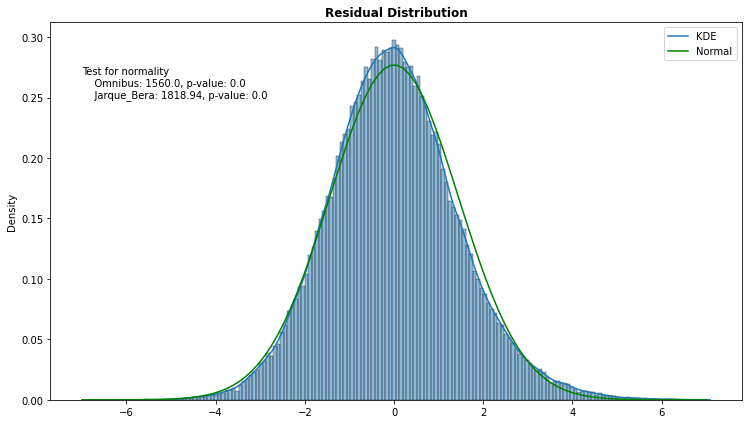

In [ ]:
plotOLSResidualsHist(resBest, 'Residual Distribution')


Check for correlation between the independent variables and the residuals. Values should be (and are) very close to 0.

In [ ]:
# calc correlation coeff between residuals and indpendent variables
[i for i in pd.concat([df0.loc[ixTr,xCols0],resBest.resid], axis=1).corr()[-1:].values[0]]

[-9.462796155686057e-16,
 3.0105891524801866e-16,
 -2.948065680520714e-16,
 -1.5578642704289762e-16,
 -1.4871211627293657e-16,
 3.8715968906059625e-16,
 -2.5549681890237745e-16,
 0.004174176676130442,
 1.9884314433915805e-16,
 -9.840359003408045e-16,
 5.009084814451088e-18,
 1.574357440227484e-16,
 9.048928567979127e-17,
 0.00018319688577338625,
 -0.032525643293351676,
 0.002487171229191689,
 -0.0072358945611498415,
 -5.1621611546554946e-17,
 0.0002325206377952752,
 -0.004786120750494614,
 1.0]

### 4.2 Model Diagnostics: Diagnostic Plots

Here, we examine the four basic diagnostic plots.

- Assumption 1. The results vs fitted plot is not a horizontal line. Possibly caused by the omission of quadratic terms. 
- Assumption 2. The residuals are not $N~(0,\sigma^2)$.
- Assumption 3. The errors are not correlated to the independent variables.
- Assumption 4. Scale-location plot increases with the fitted values; should be horizontal. QQ plot deviates from the theoretical reference line at the upper end of the range. Heteroscedasticity is present.
- Assumption 5. Durbin-Watson test near 2. Autocorrelation is not an issue.
- Assumption 6. VIF is low and the condition number is near the lower threshold of 10. Collinearity may be present but isn't likely a serious issue.
- Assumption 7 (optional). Jarque-Bera and omnibus normality tests reject the null hypothesis. Plot of residuals show they are not normally distributed. They tend to be more central, so model estimates are not necessarily bad.

Outliers and high-leverage observations are not an issue.


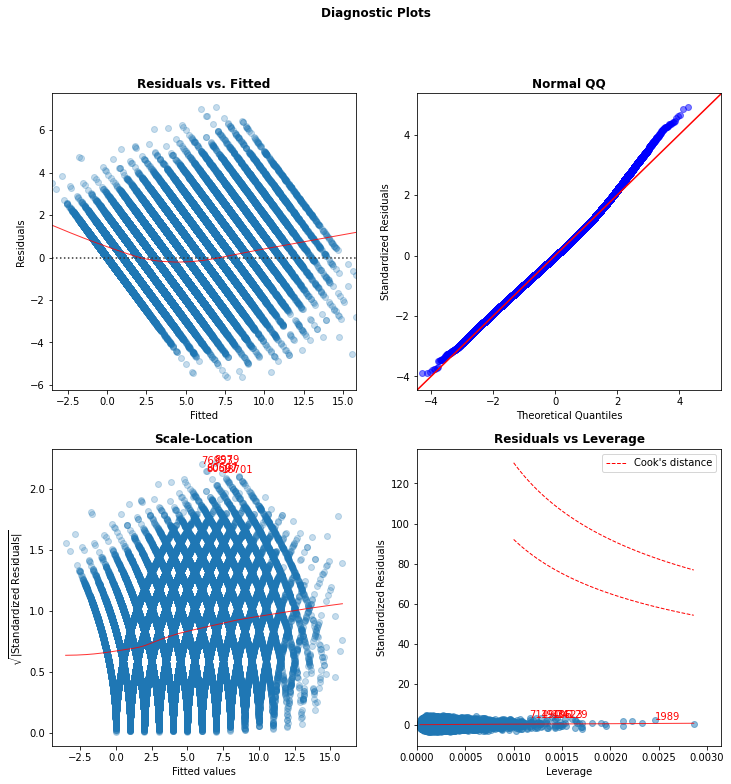

In [ ]:
_ = olsDiagnosticPlots(resBest,  
                       figureSize=(12,12),  
                       figureTitle='Diagnostic Plots')

## 5. Conclusions

The primary goal of this project was to quantify how much each of the statistics present in the MLB game logs contribute to run scoring. Our estimates are based on the coefficients of an OLS regression model. The best model for this purpose has the following parameters:

| **Parameter** | **$\hat{\beta_i}$** | **95% Conf. Int. LL** | **95% Conf. Int. UL** |
|:-------------:|:-------------------:|:---------------------:|:---------------------:|
|     const     |        4.4923       |         4.484         |         4.501         |
|     abCent    |       -0.1639       |         -0.167        |         -0.161        |
|     1bCent    |        0.6147       |         0.610         |         0.619         |
|     2bCent    |        0.8664       |         0.859         |         0.874         |
|     3bCent    |        1.1281       |         1.111         |         1.145         |
|     4bCent    |        1.5069       |         1.498         |         1.516         |
|    sachCent   |       -0.0551       |         -0.068        |         -0.043        |
|    sacfCent   |        0.3175       |         0.299         |         0.336         |
|     bbCent    |        0.3298       |         0.325         |         0.334         |
|    ibbCent    |       -0.1999       |         -0.216        |         -0.184        |
|     kCent     |       -0.0125       |         -0.016        |         -0.009        |
|     sbCent    |        0.0437       |         0.034         |         0.054         |
|     csCent    |       -0.3773       |         -0.394        |         -0.361        |
|   oppERRCent  |        0.5269       |         0.517         |         0.536         |
|   rbMiscCent  |        0.3377       |         0.321         |         0.354         |
|   xbMiscCent  |        0.2075       |         0.194         |         0.221         |
|  multOutsCent |       -0.4166       |         -0.427        |         -0.406        |

As noted in Section 4, there are some violations of the assumptions in an OLS model. Specifically,
- The correct model for this data set may not be linear in its parameters or error. (See residuals vs. fitted plot, Section 4.2)
- The residuals are not normally distributed with mean 0.
- The variance of the error terms is not constant, i.e., heteroskedasicity is a concern.
- The condition number of the design matrix is 10.5, which is near to, but still above, the lower limit of what could be a problem.

As a result, the point estimates for the coefficients may be accurate, but the upper and lower bounds of the 95% confidence interval should be viewed with caution.

Our secondary goal was to determine how robust the model is, given the problems we have identified. These problems often result in parameter estimates that are biased and confidence intervals that are sensitive to changes in the training data. However, fitting this model to 500 randomly select training data sets, the results generally agree with the estimated confidence intervals.

| **N=500 Trials** |           |            |            |            |            |            |              |              |            |             |           |            |            |                |                |                |                  |
|-----------|-----------|------------|------------|------------|------------|------------|--------------|--------------|------------|-------------|-----------|------------|------------|----------------|----------------|----------------|------------------|
|           | **const** | **abCent** | **1bCent** | **2bCent** | **3bCent** | **4bCent** | **sachCent** | **sacfCent** | **bbCent** | **ibbCent** | **kCent** | **sbCent** | **csCent** | **oppERRCent** | **rbMiscCent** | **xbMiscCent** | **multOutsCent** |
| mean      | 4.48654   | -0.16453   | 0.61492    | 0.86712    | 1.13612    | 1.50538    | -0.05407     | 0.31626      | 0.3268     | -0.20287    | -0.0125   | 0.04926    | -0.36809   | 0.52561        | 0.33834        | 0.20942        | -0.41748         |
| std       | 0.00276   | 0.00108    | 0.00163    | 0.00243    | 0.00589    | 0.00287    | 0.00447      | 0.00629      | 0.00159    | 0.00556     | 0.00099   | 0.00336    | 0.00538    | 0.00324        | 0.00578        | 0.0044         | 0.00341          |
| min       | 4.47789   | -0.16807   | 0.6101     | 0.86027    | 1.11865    | 1.49799    | -0.06725     | 0.29532      | 0.32047    | -0.21769    | -0.01534  | 0.03836    | -0.38547   | 0.51559        | 0.31299        | 0.19701        | -0.42679         |
| 5%        | 4.48226   | -0.16626   | 0.61242    | 0.86346    | 1.12632    | 1.50082    | -0.06144     | 0.30568      | 0.32428    | -0.21246    | -0.0141   | 0.04392    | -0.37648   | 0.52016        | 0.32865        | 0.20195        | -0.42297         |
| 25%       | 4.4847    | -0.16529   | 0.61379    | 0.86543    | 1.13218    | 1.50345    | -0.05718     | 0.31203      | 0.3257     | -0.20696    | -0.01317  | 0.04671    | -0.3715    | 0.52342        | 0.3348         | 0.20674        | -0.41986         |
| 50%       | 4.4866    | -0.16451   | 0.61492    | 0.86708    | 1.13609    | 1.50513    | -0.05402     | 0.31635      | 0.32684    | -0.20304    | -0.01252  | 0.0494     | -0.3681    | 0.5257         | 0.33845        | 0.20935        | -0.41759         |
| 75%       | 4.48827   | -0.16374   | 0.61606    | 0.86879    | 1.13984    | 1.50724    | -0.05108     | 0.3208       | 0.32786    | -0.19897    | -0.01185  | 0.05147    | -0.36479   | 0.52788        | 0.34223        | 0.21238        | -0.41484         |
| 95%       | 4.49102   | -0.16279   | 0.61747    | 0.87122    | 1.14615    | 1.51038    | -0.04675     | 0.32632      | 0.32935    | -0.19352    | -0.01089  | 0.0547     | -0.35917   | 0.53078        | 0.34764        | 0.21635        | -0.4122          |
| max       | 4.49594   | -0.16142   | 0.62003    | 0.87445    | 1.15589    | 1.51399    | -0.0396      | 0.33188      | 0.33063    | -0.18729    | -0.00974  | 0.05865    | -0.34865   | 0.53575        | 0.35572        | 0.22237        | -0.40763         |


It is fair to say that, despite the problems we have discovered, the estimates are consistent and reliable. We will evaluate this conclusion further by comparing these results with those from other methods, such as generalized linear models, in a follow up to this project.

## 6. Addendum

In Section 3.5.2, we claimed that no-intercept regression model was generally not good practice because is caused $R^2$ to become a meaningless quantity and could result in biased coefficient estimates. Here, we will discuss the reasons for this in detail.

### 6.1 The Coefficient of Determination

First, define the terms we are using:

- A **full model** is one that has the main effects and the error term: $y=b_0 + b_1 x_1 + ... + \epsilon$.

- An **intercept-only** or **reduced model** has only the intercept and the error term: $y = b_0 + \epsilon$

- A **no-intercept model** removes the intercept from the full model: $y=b_1 x_1 + ... + \epsilon$.

- A **noise-only** or **error-only model** has only the error term: $y=\epsilon$

Recall that $R^2$ is the ratio of the variation explained by the model to the total variation, or 

\begin{equation}\tag{1}
R^2 = 1 - \frac{RSS}{TSS}=1- \frac{\sum_i(y_i - \hat{y}_i)^2}{\sum_i(y_i - \bar{y})^2} 
\end{equation}

The ratio of the residual sum of squares (RSS) to the total sum of squares (TSS) is the proportion of unexplained variation after we have applied our full model. If the full model perfectly explains all the variation $\sum_i(y_i - \hat{y}_i)^2=0$ and $R^2=1$. If not, then the RSS describes how the observed data varies compared to the full model. The TSS describes how the observed data varies a reduced model, $\bar{y}$. 

Now, if we omit the intercept and recall that the mean of the error term is 0, 

\begin{equation}\tag{2}
R^2 =1- \frac{\sum_i(y_i - \hat{y}_i)^2}{\sum_i(y_i - \bar{y})^2}  = 1- \frac{\sum_i(y_i - \hat{y}_i)^2}{\sum_i y_i^2}
\end{equation}

Here we are trying to calculate the ratio of the RSS to the magnitude of the response variable. We are no longer comparing the unexplained variance to a reduced model. As a result, $R^2$ has no clear interpretation unless we are absolutely certain that the true value of $b_0$ is zero.

In fact, fitting a no-intercept model can result in higher values of $R^2$ that incorrectly imply better performance. To show this, let $\tilde{y}$ be the fitted values of a no-intercept model, and $\hat{y}$ be the fitted values of the full model (intercept included). Then, 

$$\tag{3}\tilde{R}^2 = 1 - \frac{\sum_i(y_i-\tilde{y})^2}{\sum_i y_i^2}
$$

and 

$$ \tag{4} R^2 = 1 - \frac{\sum_i (y_i - \hat{y})^2}{\sum_i(y_i - \bar{y})^2}
$$

We want to know what circumstances would cause $\tilde{R^2}$ to be greater than $R^2$:

$$ \tilde{R^2} > R^2 $$
$$ $$
$$1 - \frac{\sum_i(y_i-\tilde{y})^2}{\sum_i y_i^2} > 1 - \frac{\sum_i (y_i - \hat{y})^2}{\sum_i(y_i - \bar{y})^2}
$$
$$ $$
$$
\implies  \frac{\sum_i(y_i-\tilde{y})^2}{\sum_i y_i^2} < \frac{\sum_i (y_i - \hat{y})^2}{\sum_i(y_i - \bar{y})^2}
$$
$$ $$
$$\tag{5}
\implies  \frac{\sum_i(y_i-\tilde{y})^2}{\sum_i (y_i - \hat{y})^2} < \frac{\sum_i y_i^2}{\sum_i(y_i - \bar{y})^2}
$$
$$ $$
Now, 
$$\tag{6}\sum_i y_i^2 = \sum_i (y_i - \bar{y} + \bar{y})^2 = \sum_i(y_i - \bar{y})^2 + n \bar{y}^2$$
$$ $$
Substituting (6) back into (5),
$$ 
\implies  \frac{\sum_i(y_i-\tilde{y})^2}{\sum_i (y_i - \hat{y})^2} < \frac{\sum_i(y_i - \bar{y})^2 + n \bar{y}^2}{\sum_i(y_i - \bar{y})^2}
$$
$$ $$
$$\tag{7} \implies{}  \frac{\sum_i(y_i-\tilde{y})^2}{\sum_i (y_i - \hat{y})^2} < 1 + \frac{\bar{y}}{\frac{1}{n} \sum_i (y_i-\bar{y})^2}
$$

The left-hand side of the inequality is always greater than 1 because the fitted values of a no-intercept model will be worse than the fitted values of a full model. The inequality holds when $\bar{y}>> \frac{1}{n} \sum_i (y_i-\bar{y})^2$, or when the mean value of the response is much greater than the mean RSS. In such cases, the value of $\tilde{R}^2$ will be greater than $R^2$ and (in addition to being a meaningless value) falsely imply that a no-intercept model performs better than the properly specified full-model. 


### 6.2 Bias in the Estimates

 Excluding a variable from a regression model can lead to bias in the parameter estimates. To see this, we look at a case of simple linear regression. Let the true process governing our system have the form $y_i  = b_0 + b_1 x_1 + \epsilon$ and let our estimated (no-intercept) model have the form $y_i = b_1 x_1  + \epsilon$. Now find the expected value of our parameter $b_1$:

\begin{matrix}
 E[b_1] &=& E[(X_1^T X_1)^{-1} X_1^T y]\\
{}&=& E[(X_1^T X_1)^{-1}(b_0 + X b_1 + \epsilon)]\\
{}&=& E[((X_1^T X_1)^{-1} b_0 + (X_1^T X_1)^{-1}X_1 b_1) + (X_1^T X_1)^{-1} \epsilon]
\end{matrix}

Now $ (X_1^T X_1)^{-1} X_1 =1$ and we assume $E[\epsilon]=0$, so 

$$E[b_1] =E[(X_1^T X_1)^{-1} X_1^T b_0] + b_1 + 0
$$

Unless $(X_1^T X_1)^{-1} X_1^T=0$ or $b_0 = 0$, the estimate for $b_1$ is biased. We can extend this derivation to multiple linear regression by iterating over each $b_i$ and $X_i$ to find $E[b_i | X_i]$.
